**Full-Time Mannheim Master in Management Analytics 2022 (FTMMA22)**

Image Mining, Dr. Jochen Hartmann

### **Individual Case Study: "InfluencerNet"**

In [3]:
YOUR_NAME = 'Kanishk Gupta'

Please use this template for your submission. It should include all analyses (as documented Python code) and answers to the case study. Please refer to the course syllabus for detailed submission instructions.

The submission deadline is **June 2, 2022 at 11:59pm (CET).**

The submission template's structure is based on Appendix B: Machine Learning Project Checklist in [Géron (2019)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).


### 1. Frame the Problem

**Problem Statement:** To distinguish between Images with Logo and No Logos

**Solving Method:** We will use Convolutional Neural Network to classify the pictures. The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space, whereas convolution layers learn local patterns—in the case of images, patterns found in small 2D windows of the inputs

In [4]:
problem_statement = '''To distinguish between Images with Logo and No Logos'''
problem_statement

'To distinguish between Images with Logo and No Logos'

In [5]:
solving_method = '''We will use Convolutional Neural Network. The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space, whereas convolution layers learn local patterns—in the case of images, patterns found in small 2D windows of the inputs'''
solving_method

'We will use Convolutional Neural Network. The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space, whereas convolution layers learn local patterns—in the case of images, patterns found in small 2D windows of the inputs'

### 2. Get the Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os, pathlib, shutil, random

In [8]:
original_dir = pathlib.Path("train")
new_base_dir = '/content/drive/MyDrive/Colab Notebooks/Assignment'

In [9]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/drive/MyDrive/Colab Notebooks/Assignment/'

new_base_dir =  pathlib.Path("Assignment")
# The directory where we will
# store our smaller dataset
base_dir = '/content/drive/MyDrive/Colab Notebooks/Assignment/'
#os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Directory with our training Logo pictures
train_logo_dir = os.path.join(train_dir, 'logo')
#os.mkdir(train_logo_dir)

# Directory with our training No Logo pictures
train_nologo_dir = os.path.join(train_dir, 'no logo')
#os.mkdir(train_nologo_dir)

# Directory with our validation Logo pictures
validation_logo_dir = os.path.join(validation_dir, 'logo')
#os.mkdir(validation_logo_dir)

# Directory with our validation No Logo pictures
validation_nologo_dir = os.path.join(validation_dir, 'no logo')
#os.mkdir(validation_nologo_dir)

# Directory with our validation Logo pictures
test_logo_dir = os.path.join(test_dir, 'logo')
#os.mkdir(test_logo_dir)

# Directory with our validation No Logo pictures
test_nologo_dir = os.path.join(test_dir, 'no logo')
#os.mkdir(test_nologo_dir)

**#####Commented the next block to avoid recreation of multiple folders in Drive**

In [10]:
# # Copy first 97 logo images to train_logo_dir
# logo_names=os.listdir("/content/drive/MyDrive/Colab Notebooks/InfluencerNet_Images/LogoYes_Tiny")
# random.seed(45687)
# random.shuffle(logo_names)
# fnames = logo_names[:97]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_logo_dir, fname)
#     shutil.copyfile(src, dst)

#     # Copy next 50 logo images to validation_logo_dir
# fnames = logo_names[97:147]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_logo_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 50 logo images to test_logo_dir
# fnames = logo_names[147:197]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_logo_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy first 170 no-logo images to train_no_logo_dir
# no_logo_names=os.listdir("/content/drive/MyDrive/Colab Notebooks/InfluencerNet/InfluencerNet_Images/LogoNo_Tiny")
# fnames = no_logo_names[:170]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_no_logo_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 100 np-logo images to validation_no_logo_dir
# fnames = no_logo_names[170:270]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_no_logo_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 no-logo images to test_no_logo_dir
# fnames = no_logo_names[270:370]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_no_logo_dir, fname)
#     shutil.copyfile(src, dst)

**Sanity Check** - Checking the number of images in each folder

In [11]:
print('total training logo images:', len(os.listdir(train_logo_dir)))

total training logo images: 99


In [12]:
print('total training no logo images:', len(os.listdir(train_nologo_dir)))

total training no logo images: 253


In [13]:
print('total validation logo images:', len(os.listdir(validation_logo_dir)))

total validation logo images: 32


In [14]:
print('total validation no logo images:', len(os.listdir(validation_nologo_dir)))

total validation no logo images: 55


In [15]:
print('total test Logo images:', len(os.listdir(test_logo_dir)))

total test Logo images: 66


In [16]:
print('total test No Logo images:', len(os.listdir(test_nologo_dir)))

total test No Logo images: 62


### 3. Explore the Data

In [17]:
number_classes = {'train_logo': len(os.listdir(train_logo_dir)),
'train_nologo': len(os.listdir(train_nologo_dir)),
'val_logo': len(os.listdir(validation_logo_dir)),
'val_nologo': len(os.listdir(validation_nologo_dir)),
'test_logo': len(os.listdir(test_logo_dir)),
'test_nologo': len(os.listdir(test_nologo_dir))}

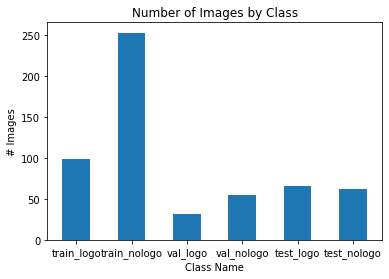

In [18]:
import matplotlib.pyplot as plt
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [19]:
#Create specific filenames for train_logo and train_nologo data for plotting purposes:
train_logo_fnames = os.listdir(train_logo_dir)
train_logo_fnames.sort()
print(train_logo_fnames[:10])


train_nologo_fnames = os.listdir(train_nologo_dir)
train_nologo_fnames.sort()
print(train_nologo_fnames[:10])

['-jv94-xYy-E.jpg', '0Nn2nDvuK8c.jpg', '1Gao19UrMAo.jpg', '1LPGB70H-qg.jpg', '1b3QyLCd8Ro.jpg', '1cDgvQ-LvMk.jpg', '1l-qeRIHdmQ.jpg', '3VKR_j-CV4U.jpg', '3Yy5vGzmpE8.jpg', '3h7jbWXhpgM.jpg']
['-BvowCsDJhw.jpg', '-K6Y2x7hsk8.jpg', '-grE6ISnjZM.jpg', '-n2crxbj3Ho.jpg', '09QAS5FLjfo.jpg', '0gU8r-eowf4.jpg', '0jAM2cR_7b4.jpg', '0pKToaIjLE4.jpg', '0tznP3luhwQ.jpg', '0u9x2g7LblQ.jpg']


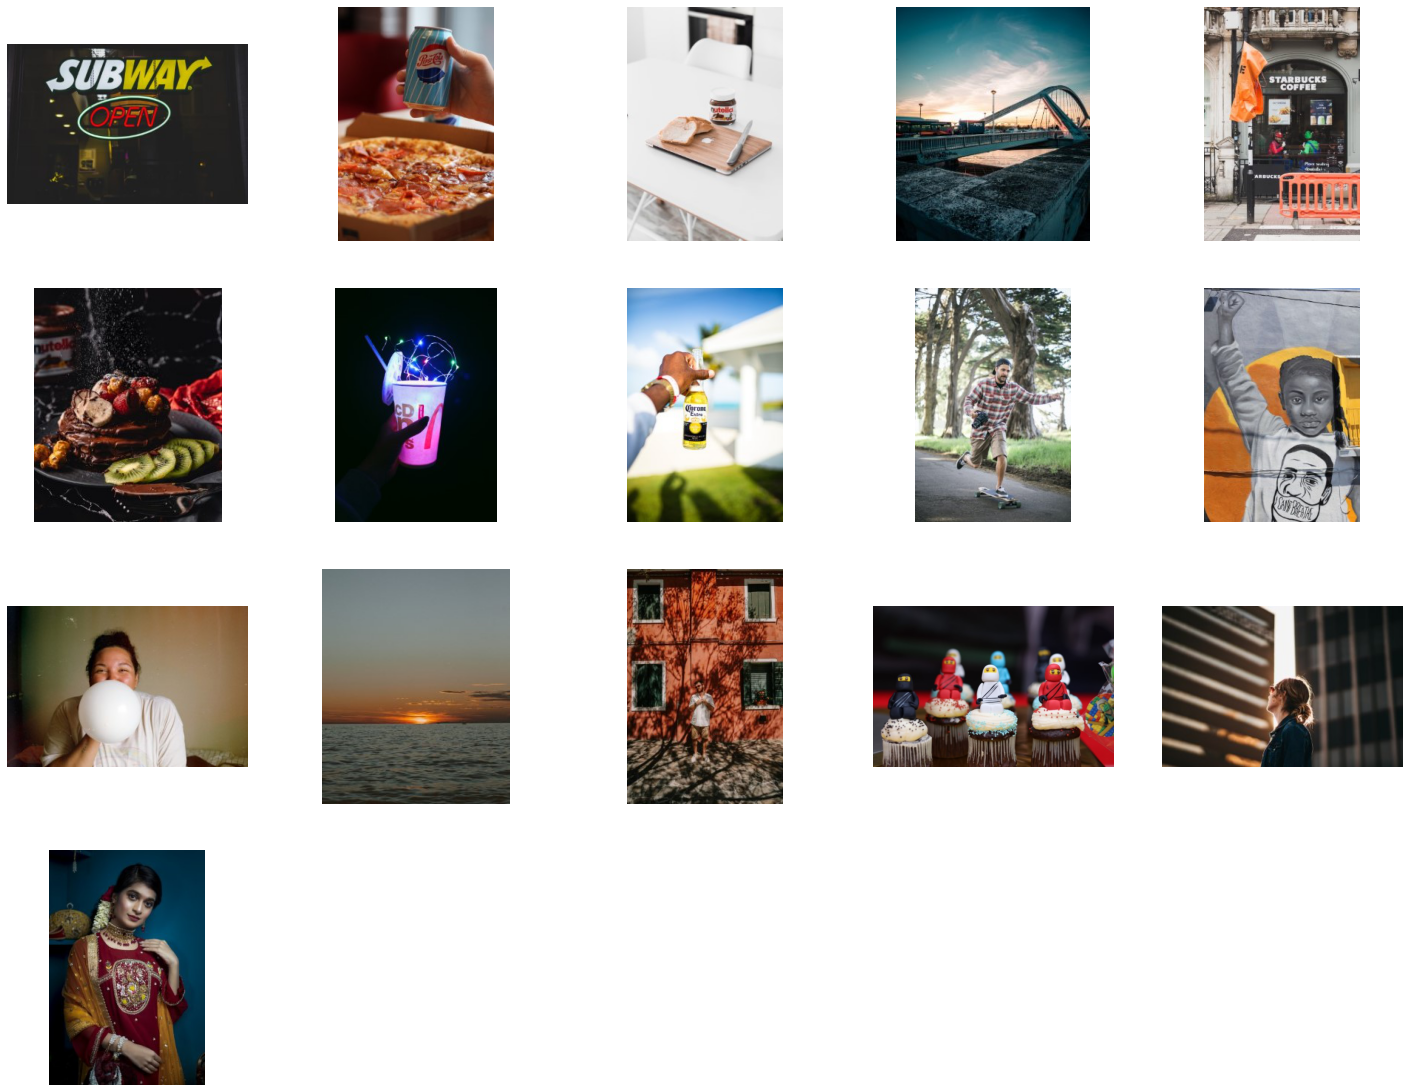

In [20]:
#Parameters for our graph; we'll output images in a 4x4 configuration
import matplotlib.image as mpimg
nrows = 5
ncols = 5

#index for iterating over images
pic_index = 0

# Plotting the first 9 pictures of the training dataset to get some understanding
picture = plt.gcf()
picture.set_size_inches(ncols * 5, nrows *5)

pic_index +=8
logoyes_pics = [(os.path.join(train_logo_dir, fname))
  for fname in train_logo_fnames[pic_index-8:pic_index]]
logono_pics = [(os.path.join(train_nologo_dir, fname))
  for fname in train_nologo_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(logoyes_pics+logono_pics):
# Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols, i +1)
  sp.axis('Off') #Don't show axis

  img = mpimg.imread(img_path)
  plt.imshow(img)


plt.show()

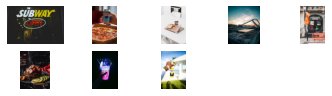

In [21]:
#show seperate only logo pics
for i, img_path in enumerate(logoyes_pics):
# Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols, i +1)
  sp.axis('Off') #Don't show axis

  img = mpimg.imread(img_path)
  plt.imshow(img)


plt.show()

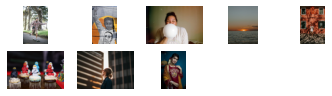

In [22]:
#show seperate only nologo pics
for i, img_path in enumerate(logono_pics):
# Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows,ncols, i +1)
  sp.axis('Off') #Don't show axis

  img = mpimg.imread(img_path)
  plt.imshow(img)


plt.show()

### 4. Prepare the Data

In [23]:
from tensorflow.keras.utils import image_dataset_from_directory
    
train_dataset = image_dataset_from_directory(
            '/content/drive/MyDrive/Colab Notebooks/Assignment/train',
            image_size=(180, 180),
            batch_size=32)
validation_dataset = image_dataset_from_directory(
            '/content/drive/MyDrive/Colab Notebooks/Assignment/validation',
            image_size=(180, 180),
            batch_size=32)
test_dataset = image_dataset_from_directory(
            '/content/drive/MyDrive/Colab Notebooks/Assignment/test',
            image_size=(180, 180),
            batch_size=32)


Found 352 files belonging to 2 classes.
Found 87 files belonging to 2 classes.
Found 128 files belonging to 2 classes.


In [24]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


### 5. Shortlist Promising Models

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (180, 180 , 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size = 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size = 2) (x)
x = layers.Conv2D(filters=64, kernel_size = 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size = 2) (x)
x = layers.Conv2D(filters=128, kernel_size = 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size = 2) (x)
x = layers.Conv2D(filters=256, kernel_size = 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size = 2) (x)
x = layers.Conv2D(filters=256, kernel_size = 3, activation="relu") (x)
x = layers.Flatten() (x)
outputs = layers.Dense(1, activation="sigmoid") (x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [27]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


**5a** Executing the Model by training our own Convolutional Layer

In [28]:
callbacks = [
  keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss")
]

In [29]:
history = model.fit(
 train_dataset,
 epochs=15,   #Originally 30
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/15
11/11 [==============================] - 41s 4s/step - loss: 0.6211 - acc: 0.7017 - val_loss: 0.7676 - val_acc: 0.6322
Epoch 2/15
11/11 [==============================] - 29s 3s/step - loss: 0.6025 - acc: 0.7188 - val_loss: 0.6827 - val_acc: 0.6322
Epoch 3/15
11/11 [==============================] - 29s 3s/step - loss: 0.5946 - acc: 0.7188 - val_loss: 0.6637 - val_acc: 0.6322
Epoch 4/15
11/11 [==============================] - 29s 3s/step - loss: 0.5995 - acc: 0.7188 - val_loss: 0.6744 - val_acc: 0.6322
Epoch 5/15
11/11 [==============================] - 29s 3s/step - loss: 0.5927 - acc: 0.7188 - val_loss: 0.6762 - val_acc: 0.6322
Epoch 6/15
11/11 [==============================] - 28s 3s/step - loss: 0.5908 - acc: 0.7188 - val_loss: 0.6841 - val_acc: 0.6322
Epoch 7/15
11/11 [==============================] - 28s 3s/step - loss: 0.5880 - acc: 0.7188 - val_loss: 0.7024 - val_acc: 0.6322
Epoch 8/15
11/11 [==============================] - 28s 3s/step - loss: 0.5762 - acc: 0.73

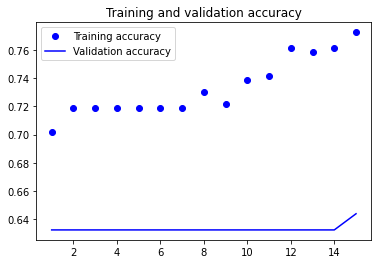

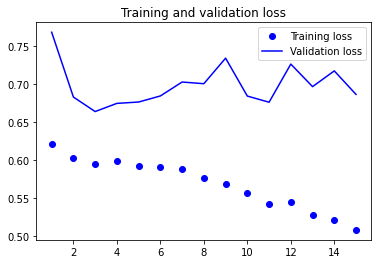

In [30]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy") 
plt.plot(epochs, val_acc, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy stabilises at nearly 72% and then increases, whereas the validation accuracy stabilises at 64%.
The validation loss reaches its minimum after only three epochs and then increases, whereas
the training loss keeps decreasing linearly as training proceeds.

In [31]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 16s 618ms/step - loss: 0.7301 - acc: 0.4844
Test accuracy: 0.484


We get a test accuracy of 48.4%.
Because we have relatively few training samples, overfitting will be our
number one concern.

### 6. Fine-tune the System

**6a** Data Augmentation

If we train a new model using this data-augmentation configuration, the model will never see the same input twice. But the inputs it sees are still heavily intercorrelated because they come from a small number of original images—we can’t produce new information; we can only remix existing information. As such, this may not be enough to completely get rid of overfitting.

Adding a data augmentation stage and a classifier to the convolutional base

In [32]:
data_augmentation = keras.Sequential(
            [
               layers.RandomFlip("horizontal"),
               layers.RandomRotation(0.1),
               layers.RandomZoom(0.2),
] )

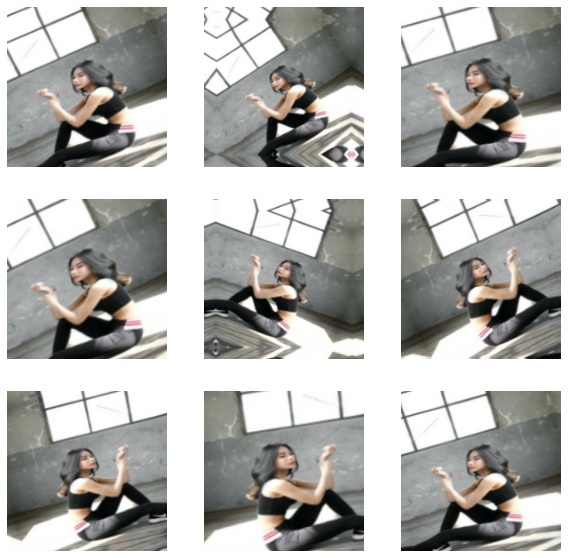

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1) 
    plt.imshow(augmented_images[0].numpy().astype("uint8")) 
    plt.axis("off")

In [34]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [36]:
history = model.fit(
    train_dataset,
    epochs=50,   #originally 100
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
11/11 [==============================] - 31s 3s/step - loss: 0.9282 - accuracy: 0.6591 - val_loss: 0.6636 - val_accuracy: 0.6322
Epoch 2/50
11/11 [==============================] - 29s 3s/step - loss: 0.6264 - accuracy: 0.7188 - val_loss: 0.6644 - val_accuracy: 0.6322
Epoch 3/50
11/11 [==============================] - 29s 3s/step - loss: 0.6227 - accuracy: 0.7188 - val_loss: 0.6757 - val_accuracy: 0.6322
Epoch 4/50
11/11 [==============================] - 31s 3s/step - loss: 0.6217 - accuracy: 0.7188 - val_loss: 0.6584 - val_accuracy: 0.6322
Epoch 5/50
11/11 [==============================] - 29s 3s/step - loss: 0.6088 - accuracy: 0.7188 - val_loss: 0.6552 - val_accuracy: 0.6322
Epoch 6/50
11/11 [==============================] - 29s 3s/step - loss: 0.6267 - accuracy: 0.7188 - val_loss: 0.6563 - val_accuracy: 0.6322
Epoch 7/50
11/11 [==============================] - 29s 3s/step - loss: 0.6039 - accuracy: 0.7188 - val_loss: 0.6656 - val_accuracy: 0.6322
Epoch 8/50
11/11 [==

Evaluating the model on the test set

In [37]:
test_model = keras.models.load_model(
            "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 3s 617ms/step - loss: 0.6436 - accuracy: 0.6484
Test accuracy: 0.648


**`6b`** Using Pre trained convolutional network to increase accuracy by training the model on Imagenet dataset.
We use the last layer of convolutional network to train on our dataset and predict on test data.

By further tuning the model’s configuration (such as the number of filters per
convolution layer, or the number of layers in the model), we might be able to get an even better accuracy, likely up to 90%. But it would prove difficult to go any higher just by training our own convnet from scratch, because we have so little data to work with. As a next step to improve our accuracy on this problem, we’ll have to use a pretrained model.

pretrained model is a model that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset
is large enough and general enough, the spatial hierarchy of features learned by
the pretrained model can effectively act as a generic model of the visual world, and hence, its features can prove useful for many different computer vision problems, even though these new problems may involve completely different classes than those of the original task.

VGG16 - Imagenet - Pretrained

Instantiating and freezing the VGG16 convolutional base

In [38]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [39]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [40]:
import numpy as np
def get_features_and_labels(dataset):
 all_features = []
 all_labels = []
 for images, labels in dataset:
  preprocessed_images = keras.applications.vgg16.preprocess_input(images)
  features = conv_base.predict(preprocessed_images)
  all_features.append(features)
  all_labels.append(labels)
 return np.concatenate(all_features), np.concatenate(all_labels)

In [41]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [42]:
train_features.shape

(352, 5, 5, 512)

In [43]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])


In [44]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss")
]


In [45]:
history = model.fit(
 train_features, train_labels,
 epochs=10,   #originally 20
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

Epoch 1/10
11/11 [==============================] - 1s 97ms/step - loss: 35.5053 - accuracy: 0.7159 - val_loss: 25.1960 - val_accuracy: 0.8161
Epoch 2/10
11/11 [==============================] - 0s 44ms/step - loss: 5.6302 - accuracy: 0.9205 - val_loss: 25.8662 - val_accuracy: 0.8046
Epoch 3/10
11/11 [==============================] - 1s 49ms/step - loss: 2.4159 - accuracy: 0.9517 - val_loss: 19.4203 - val_accuracy: 0.8161
Epoch 4/10
11/11 [==============================] - 0s 44ms/step - loss: 0.3268 - accuracy: 0.9858 - val_loss: 19.8718 - val_accuracy: 0.8161
Epoch 5/10
11/11 [==============================] - 1s 49ms/step - loss: 0.0586 - accuracy: 0.9972 - val_loss: 20.7731 - val_accuracy: 0.8161
Epoch 6/10
11/11 [==============================] - 0s 42ms/step - loss: 0.3613 - accuracy: 0.9858 - val_loss: 20.9165 - val_accuracy: 0.8276
Epoch 7/10
11/11 [==============================] - 0s 43ms/step - loss: 0.1441 - accuracy: 0.9943 - val_loss: 21.4830 - val_accuracy: 0.8046
Epoch

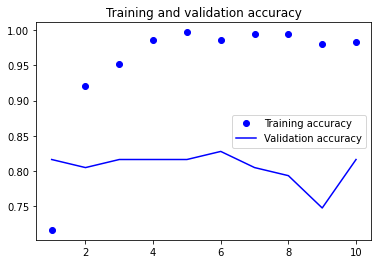

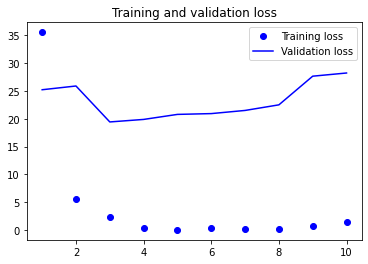

In [46]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [47]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)
conv_base.trainable = False

Freezing all layers until the fourth from the last

In [48]:
conv_base.trainable = True
print("This is the number of trainable weights "
 "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [49]:
conv_base.trainable = False
print("This is the number of trainable weights "
 "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


Fine-tuning the model

In [50]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [51]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_with_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss")
]

In [52]:
history = model.fit(
 train_dataset,
 epochs=25,     #originally 50
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/25
11/11 [==============================] - 147s 13s/step - loss: 54.9063 - accuracy: 0.7017 - val_loss: 23.2765 - val_accuracy: 0.7356
Epoch 2/25
11/11 [==============================] - 146s 13s/step - loss: 16.5053 - accuracy: 0.8210 - val_loss: 16.2250 - val_accuracy: 0.8391
Epoch 3/25
11/11 [==============================] - 142s 13s/step - loss: 15.1673 - accuracy: 0.8239 - val_loss: 19.8038 - val_accuracy: 0.8506
Epoch 4/25
11/11 [==============================] - 145s 13s/step - loss: 9.1743 - accuracy: 0.8892 - val_loss: 17.4217 - val_accuracy: 0.8506
Epoch 5/25
11/11 [==============================] - 146s 13s/step - loss: 4.7763 - accuracy: 0.9062 - val_loss: 36.8733 - val_accuracy: 0.8046
Epoch 6/25
11/11 [==============================] - 143s 13s/step - loss: 11.2181 - accuracy: 0.8693 - val_loss: 17.2785 - val_accuracy: 0.8276
Epoch 7/25
11/11 [==============================] - 143s 13s/step - loss: 5.7490 - accuracy: 0.9062 - val_loss: 20.2357 - val_accuracy: 0.

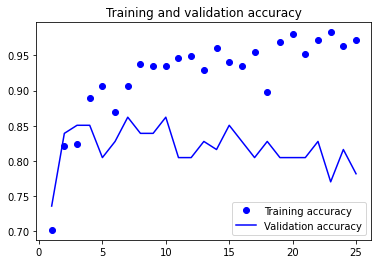

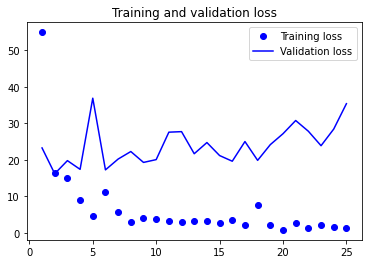

In [53]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [54]:
test_model = keras.models.load_model(
 "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 42s 10s/step - loss: 22.2719 - accuracy: 0.7344
Test accuracy: 0.734


### 7. Present Your Solution
Please briefly summarize your results and reflect on your key learnings: 

What went well? What didn't go well?

What are your system's limitations? 

What would you try or change if you had more time for this machine-learning project?

Please briefly summarize your results and reflect on your key learnings:

Initially, I started training my own convolutional model with the image dataset that I had without using any off the shelf trained network. We get a test accuracy of 48.4%. Because we have relatively few training samples, overfitting will be our number one concern. The training accuracy stabilises at nearly 72% and then increases, whereas the validation accuracy stabilises at 64%.
The validation loss reaches its minimum after only three epochs and then increases, whereas the training loss keeps decreasing linearly as training proceeds.

To Fine Tune the data, I use data augmentation.The model will never see the same input twice. But the inputs it sees are still heavily intercorrelated because they come from a small number of original images—we can’t produce new information; we can only remix existing information. As such, this may not be enough to completely get rid of overfitting.

By further tuning the model’s configuration (such as the number of filters per convolution layer, or the number of layers in the model), we might be able to get an even better accuracy, likely up to 90%. But it would prove difficult to go any higher just by training our own convnet from scratch, because we have so little data to work with. As a next step to improve our accuracy on this problem, we’ll have to use a pretrained model.

Pretrained model is a model that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, the spatial hierarchy of features learned by the pretrained model can effectively act as a generic model of the visual world, and hence, its features can prove useful for many different computer vision problems, even though these new problems may involve completely different classes than those of the original task.

We get a test accuracy of 73.4%. The training accuracy stabilises at nearly 95% and then increases, whereas the validation accuracy oscillates at 82%.
The validation loss reaches its minimum after only two epochs and then increases, whereas the training loss keeps decreasing linearly as training proceeds.

**What went well? What didn't go well?**


*   If we train a new model using this data-augmentation configuration, the model will never see the same input twice. But the inputs it sees are still heavily intercorrelated because they come from a small number of original images—we can’t produce new information; we can only remix existing information. As such, this may not be enough to completely get rid of overfitting.A number of techniques that can help mitigate overfitting are dropout and weight decay (L2 regularization).
*   Convnets are the best type of machine learning models for computer vision
tasks. It’s possible to train one from scratch even on a very small dataset, with decent results. Convnets work by learning a hierarchy of modular patterns and concepts to represent the visual world.
*   On a small dataset, overfitting will be the main issue. Data augmentation is a powerful way to fight overfitting when you’re working with image data. It’s easy to reuse an existing convnet on a new dataset via feature extraction.
This is a valuable technique for working with small image datasets.As a complement to feature extraction, we used fine-tuning, which adapts to
a new problem some of the representations previously learned by an existing
model. This pushes performance a bit further.


**What are your system's limitations?**
*   Image Dataset was too low. Having a larger dataset would help in distributing more images to train, test, validation split.
*   Convolutional layers could be increased to enhance the learning and increase accuracy.
*   Google Colab used to take a lot of time to run the epochs. Having a premium account for Google Colab could increase computng speed. 
*   Instead of VGG16 which has become old, Efficient Net or Mobile Net could be used.

**What would you try or change if you had more time for this machine-learning project?**



*   Use a large dataset to train the convolutional neural network. “Deep learning is only relevant when you have a huge amount of data”. CNN requires the ability to learn features automatically from the data, which is generally only possible when lots of training data is available.
*   Use Dropout and L2 Regularization to reduce overfitting
*   Use multiple pre-trained dataset and their weights to increase accuracy
*   To improve CNN model performance, we can tune parameters like epochs, learning rate etc.. Number of epochs definitely affect the performance. For large number of epochs , there is improvement in performance. But need to do certain experimentation for deciding epochs, learning rate. We can see after certain epochs there is not any reduction is training loss and improvement in training accuracy. Accordingly we can decide number of epochs.
*   Deeper networks capture the natural “hierarchy” that is present everywhere in nature. Convnet captures low level features in first layer, a little better but still low level features in the next layer and at higher layers object parts and simple structures are captured. The advantage of multiple layers is that they can learn features at various levels of abstraction.
*   Cross validation is a nice technique to avoid overfitting problem







### 8. "Launch"
Please submit your **Jupyter Notebook (.ipynb)** and a **PDF version** of it on Canvas.
 
Both files should include *all cell outputs* after running the entire script.  You do not need to submit the ConvNet itself.

Congrats. You made it!